<h1><center>INFO 370 Final Project: Predicting Global Dietary Risks</center></h1>
<h2><center>Brian Luu, Sherry Gao, Youta Ishii, Zak Zheng</center></h2>

In this project, we aim to gain understanding of how certain food cultures influence the overall health of a person. We will be taking a look at countries with unique food cultures and seeing how the differences influence a human being based on several health metrics. (Life Expectancy, Rate of Disease Infection, Infant Mortality Rates, etc.)  


I obtained our dataset from GHDx, the URL for this particular dataset is 
http://ghdx.healthdata.org/gbd-results-tool/result/222c99dbd6d88a9661e40a1384c1c404

The column glossary can be found on
http://www.healthdata.org/terms-defined

We downloaded our dataset with following options:

GHDx dataset

Context: Risk

Location: 8 regions
Global and 

Causes:
N/A

Risk: 20 in total
16 dietary factors  
Alcohol use  
Iron deficiency  
Vitamin A deficiency  
Zinc deficiency  

Age: All

Sex: All

Year: 1990, 1995, 2000, 2005, 2010, 2015
Measure: Death

Metric: Percent

Data download address:
http://ghdx.healthdata.org/gbd-results-tool/result/222c99dbd6d88a9661e40a1384c1c404

If you want to know what a term/column means
http://www.healthdata.org/terms-defined
Sike this doesnt define them all 


Note: There are many causes of deaths that are definitely not relevant to diet, i.e., HIV/AIDS, animal contact, injuries etc. But there are many equally causes that might be related to diet, we have picked 20 risk factors but there are many other ones such as intestinal nematode infectoins, wrinary diseases and male intertility, gynecological diseases that we did not include. The choice of risks is somewhat ad hoc but we believe it is sufficently reliable.

Another note: I changed my dataset as I was working through our first agreed version, so I have a slightly different one than others'. There are many factors missing in the data, this data is the same as we will see towards the end and so I have decided to expand it a bit by including more age groups and  number of years.

## Set up

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import plotly.graph_objs as go
import seaborn as sns
import statsmodels.formula.api as smf # linear modeling

# Read in data
import pandas as pd
data = pd.read_csv('./final.csv')
#import the module so that we can tables when printing dataframes
from IPython.display import display, HTML

## Data Structure
Get a general sense of the total dataset.

## Data Preparation
### Dataset Refinement

For my part, I have chosen to analyze the data in **Latin America** in 2015. So I have cleaned the data futher and I have decided to look at the age of all population.

In [14]:
df.year.unique()

array([1990, 2010, 2000, 2005, 1995, 2015])

In [15]:
#Uncomment this code to manually check and select areas
df.location_name.unique()

array(['Europe & Central Asia - WB', 'North America',
       'Latin America & Caribbean - WB', 'Sub-Saharan Africa - WB',
       'Middle East & North Africa - WB', 'South Asia - WB', 'Global',
       'East Asia & Pacific - WB'], dtype=object)

In [16]:
# Create dataframes for each risk
df = df[df.rei_name != 'Low physical activity']
df = df[df.rei_name != 'Dietary risks']


alcohol_use = df.loc[df['rei_name'] == 'Alcohol use']
iron_deficiency = df.loc[df['rei_name'] == 'Iron deficiency']
vitamin_a_def = df.loc[df['rei_name'] == 'Vitamin A deficiency']
zinc_def = df.loc[df['rei_name'] == 'Zinc deficiency']
low_fruits = df.loc[df['rei_name'] == 'Diet low in fruits']
low_vegetables = df.loc[df['rei_name'] == 'Diet low in vegetables']
low_wholegrains = df.loc[df['rei_name'] == 'Diet low in whole grains']
low_nutsseeds = df.loc[df['rei_name'] == 'Diet low in nuts and seeds']
low_milk = df.loc[df['rei_name'] == 'Diet low in milk']
high_redmeat = df.loc[df['rei_name'] == 'Diet high in red meat']
high_processedmeat = df.loc[df['rei_name'] == 'Diet high in processed meat']
high_sugarbev = df.loc[df['rei_name'] == 'Diet high in sugar-sweetened beverage']
low_fiber = df.loc[df['rei_name'] == 'Diet low in fiber']
suboptimal_calcium = df.loc[df['rei_name'] == 'Diet suboptimal in calcium']
low_omega3 = df.loc[df['rei_name'] == 'Diet low in seafood omega-3 fatty acids']
low_polyunsaturated = df.loc[df['rei_name'] == 'Diet low in polyunsaturated fatty acids']
high_transfattyacid = df.loc[df['rei_name'] == 'Diet high in trans fatty acids']
high_sodium = df.loc[df['rei_name'] == 'Diet high in sodium']

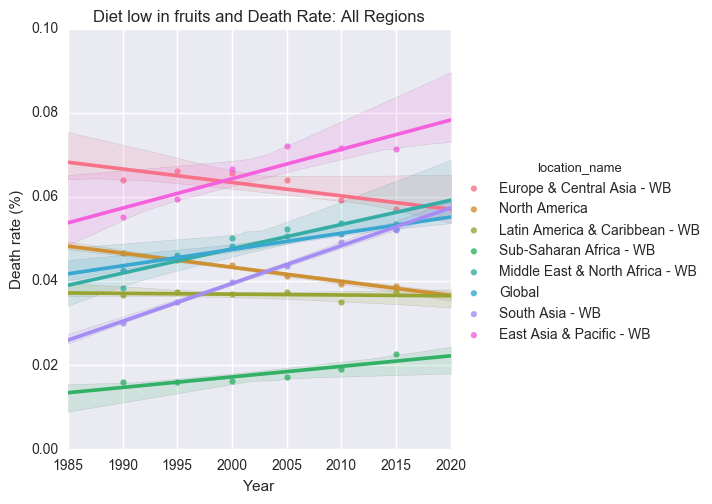

In [17]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

columns = df.rei_name.unique().tolist()
selection = widgets.Dropdown(description = 'Select a risk')
selection.options = columns
display(selection)

def on_button_clicked(b):
    clear_output()
    p = sns.lmplot(x="year", y="val", hue="location_name", data=df[df['rei_name']==selection.value]);
    plt.xlabel('Year')
    plt.ylabel('Death rate (%)')
    plt.title(selection.value + ' and Death Rate: All Regions')
    
button = widgets.Button(description='Create graph')
display(button)

button.on_click(on_button_clicked)

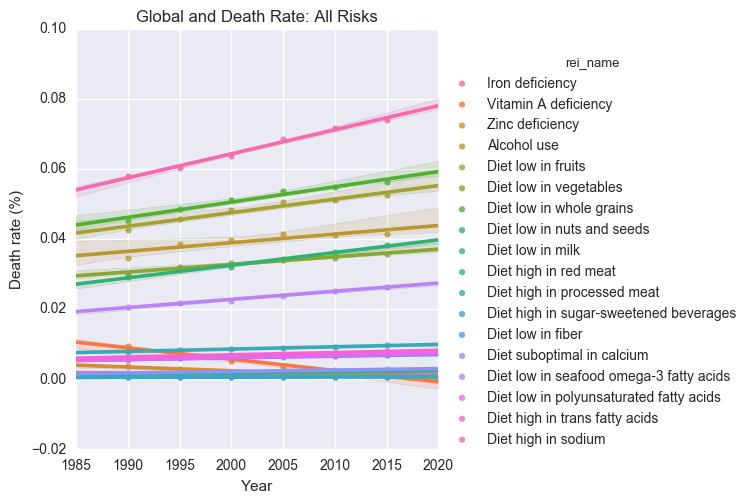

In [18]:
columns2 = df.location_name.unique().tolist()
selection2 = widgets.Dropdown(description = 'Select a location')
selection2.options = columns2
display(selection2)

def on_button2_clicked(b):
    clear_output()
    p2 = sns.lmplot(x="year", y="val", hue="rei_name", data=df[df['location_name']==selection2.value]);
    plt.xlabel('Year')
    plt.ylabel('Death rate (%)')
    plt.title(selection2.value + ' and Death Rate: All Risks')
    
button2 = widgets.Button(description='Create graph')
display(button2)

button2.on_click(on_button2_clicked)

In [55]:
columns3 = df.rei_name.unique().tolist()
selection3 = widgets.Dropdown(description = 'Select a risk')
selection3.options = columns3
display(selection3)

def on_button3_clicked(b):
    clear_output()
    print(selection3.value + " Summary")
    lm = smf.ols(formula='val ~ year', data=df[df['rei_name']==selection3.value]).fit()
    print(lm.summary())
    
button3 = widgets.Button(description='Create Summary')
display(button3)

button3.on_click(on_button3_clicked)

Diet low in fiber Summary
                            OLS Regression Results                            
Dep. Variable:                    val   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1043
Date:                Tue, 07 Mar 2017   Prob (F-statistic):              0.748
Time:                        11:53:53   Log-Likelihood:                 191.08
No. Observations:                  48   AIC:                            -378.2
Df Residuals:                      46   BIC:                            -374.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0433     

In [87]:
regr = linear_model.LinearRegression()
test = df.val[df['rei_name']=='alcohol_use']

selection3 = widgets.Dropdown(description = 'Select a risk')
selection3.options = columns
display(selection3)

selection2 = widgets.Dropdown(description = 'Select a location')
selection2.options = columns2
display(selection2)

def on_button3_clicked(b):
    clear_output()
    print(selection3.value + " Summary")
    lm = smf.ols(formula='val ~ year', data=df[df['rei_name']==selection3.value]).fit()
    print(lm.summary())
    
button3 = widgets.Button(description='Create Summary')
display(button3)

button3.on_click(on_button3_clicked)

Series([], Name: val, dtype: float64)
